In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
input_data_path ="/insert_file_path/all_tunes_cleaned_removed_whitespace.txt"  #"/content/drive/MyDrive/Universitetet/5. Semester/Deep Learning/PROJEKT - Deep Learning/Projektkode/Data/all_tunes_cleaned_removed_whitespace.txt"
white_space_input_data_path = "/insert_file_path/all_tunes_cleaned.txt"
with open(input_data_path) as file:
    data = file.read()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
print(data[:100])

X:1
L:1/8
M:4/4
K:Emin
|:E2EFE2EF|DEFGAFDF|E2EFE2B2|1efe^de2e2:|2efe^de3B|:e2efg2fe|
defgafdf|1e2efg


In [11]:
symbol_counter = dict()
for symbol in data:
  if symbol in symbol_counter:
    symbol_counter[symbol] += 1
  else:
    symbol_counter[symbol] = 1

In [12]:
# I hardcoded the formatting :(
top_n = 25
amount_symbols = len(data)
print(f"TOP {min(top_n, len(symbol_counter))} MOST FREQUENT SYMBOLS:")
print(f"Symbol | Amount ")
print("-" * 35)

symbol_counter_sorted = sorted(symbol_counter.items(), key=lambda item: item[1], reverse=True)
for key, value in symbol_counter_sorted[:top_n]:
  print(f" {repr(key):<5} | {value:<10,} ({value / amount_symbols * 100:.2f} %)")

TOP 25 MOST FREQUENT SYMBOLS:
Symbol | Amount 
-----------------------------------
 '|'   | 4,280,274  (9.19 %)
 '2'   | 3,380,644  (7.26 %)
 'A'   | 3,003,827  (6.45 %)
 'd'   | 2,850,950  (6.12 %)
 'B'   | 2,749,611  (5.90 %)
 'c'   | 2,227,917  (4.78 %)
 'e'   | 2,219,807  (4.77 %)
 'G'   | 2,205,273  (4.73 %)
 '\n'  | 1,817,951  (3.90 %)
 '/'   | 1,745,365  (3.75 %)
 '"'   | 1,740,571  (3.74 %)
 'f'   | 1,689,535  (3.63 %)
 ':'   | 1,477,719  (3.17 %)
 'g'   | 1,409,327  (3.03 %)
 'F'   | 1,310,698  (2.81 %)
 'D'   | 1,055,687  (2.27 %)
 'E'   | 1,036,616  (2.23 %)
 '3'   | 907,633    (1.95 %)
 'a'   | 893,702    (1.92 %)
 '>'   | 705,994    (1.52 %)
 '4'   | 655,733    (1.41 %)
 '('   | 651,967    (1.40 %)
 '1'   | 568,405    (1.22 %)
 ')'   | 472,846    (1.02 %)
 '8'   | 374,554    (0.80 %)


In [ ]:

def print_top_symbols(symbol_counter, amount_symbols, top_n):

    if not symbol_counter:
        raise ValueError("symbol_counter must not be empty.")

    # Sort symbols by frequency
    symbol_counter_sorted = sorted(symbol_counter.items(), key=lambda item: item[1], reverse=True)

    # Prepare header
    top_display = min(top_n, len(symbol_counter))
    print(f"TOP {top_display} MOST FREQUENT SYMBOLS:")
    print(f"Symbol | Amount      | Percentage")
    print("-" * 35)

    # Print each symbol and its stats
    for key, value in symbol_counter_sorted[:top_display]:
        percentage = (value / amount_symbols) * 100
        print(f" {repr(key):<5} | {value:<10,} | {percentage:>7.2f} %")

print_top_symbols(symbol_counter, amount_symbols, top_n)

TOP 25 MOST FREQUENT SYMBOLS:
Symbol | Amount      | Percentage
-----------------------------------
 '|'   | 4,280,274  |    9.19 %
 '2'   | 3,380,644  |    7.26 %
 'A'   | 3,003,827  |    6.45 %
 'd'   | 2,850,950  |    6.12 %
 'B'   | 2,749,611  |    5.90 %
 'c'   | 2,227,917  |    4.78 %
 'e'   | 2,219,807  |    4.77 %
 'G'   | 2,205,273  |    4.73 %
 '\n'  | 1,817,951  |    3.90 %
 '/'   | 1,745,365  |    3.75 %
 '"'   | 1,740,571  |    3.74 %
 'f'   | 1,689,535  |    3.63 %
 ':'   | 1,477,719  |    3.17 %
 'g'   | 1,409,327  |    3.03 %
 'F'   | 1,310,698  |    2.81 %
 'D'   | 1,055,687  |    2.27 %
 'E'   | 1,036,616  |    2.23 %
 '3'   | 907,633    |    1.95 %
 'a'   | 893,702    |    1.92 %
 '>'   | 705,994    |    1.52 %
 '4'   | 655,733    |    1.41 %
 '('   | 651,967    |    1.40 %
 '1'   | 568,405    |    1.22 %
 ')'   | 472,846    |    1.02 %
 '8'   | 374,554    |    0.80 %


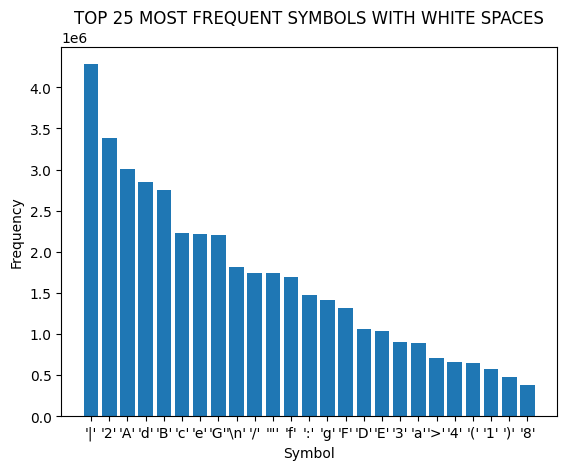

In [14]:
# Top n most frequent symbols
keys, values = zip(*symbol_counter_sorted[:top_n])
keys = [repr(key) for key in keys]

plt.bar(keys, values)
plt.title(f"TOP {min(top_n, len(symbol_counter))} MOST FREQUENT SYMBOLS WITH WHITE SPACES")
plt.xlabel("Symbol")
plt.ylabel("Frequency")

plt.show()

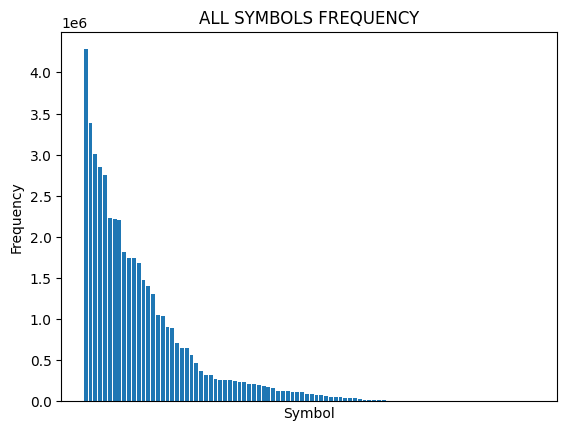

In [15]:
# All symbols
keys, values = zip(*symbol_counter_sorted[:len(symbol_counter)])
keys = [repr(key) for key in keys]

plt.bar(keys, values)
plt.title(f"ALL SYMBOLS FREQUENCY")
plt.xticks([])
plt.xlabel("Symbol")
plt.ylabel("Frequency")

plt.show()

The 75th quantile includes 36 out of 94 total characters.


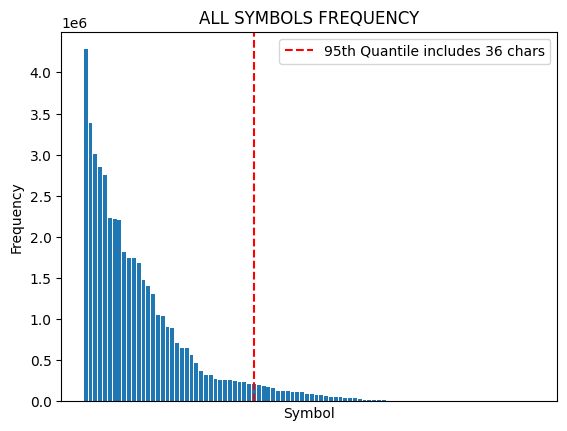

In [ ]:

keys, values = zip(*symbol_counter_sorted[:len(symbol_counter_sorted)])
keys = [repr(key) for key in keys]

cumulative_sum = np.cumsum(values)

total_sum = cumulative_sum[-1]
quantile_75_value = total_sum * 0.95

# Find the index corresponding to the 75th quantile
index_75 = np.where(cumulative_sum >= quantile_75_value)[0][0]

# Calculate the number of characters included
num_characters_75 = index_75 + 1  # Indices are 0-based, so add 1
total_characters = len(values)

print(f"The 75th quantile includes {num_characters_75} out of {total_characters} total characters.")

# Optional visualization
plt.bar(keys, values)
plt.axvline(x=index_75, color='r', linestyle='--', label=f"95th Quantile includes {num_characters_75} chars")
plt.title(f"ALL SYMBOLS FREQUENCY")
plt.xticks([])
plt.xlabel("Symbol")
plt.ylabel("Frequency")
plt.legend()

plt.show()